In [0]:
from scipy.interpolate import griddata
import numpy as np
from google.colab import files
import pandas as pd

In [1]:
!ls -al

total 16
drwxr-xr-x 1 root root 4096 Feb 26 17:33 .
drwxr-xr-x 1 root root 4096 Mar  2 07:59 ..
drwxr-xr-x 1 root root 4096 Feb 26 17:33 .config
drwxr-xr-x 1 root root 4096 Feb 26 17:33 sample_data


In [0]:
uploaded = files.upload()

Saving MainDataset.csv to MainDataset (1).csv


In [0]:
# data = pd.read_csv('MainDataset.csv')
data = pd.read_csv('Mock.csv')

In [0]:
location = []
lat = []
long = []
z = []
for i,row in data.iterrows():
  roundedLat = round(row[4],3)
  roundedLong = round(row[5],3)
  location += [[roundedLat,roundedLong]]
  lat += [roundedLat]
  long += [roundedLong]
  if row[6] == 'Murder':
    z += [100]
  elif row[6] == 'Rape':
    z += [90]
  elif row[6] == 'Domestic Violence':
    z += [80]
  elif row[6] == 'Theft':
    z += [70]
  elif row[6] == 'Fraud' or row[6] == 'Drugs':
    z += [60]
  else:
    z += [0]
    
minLat = sorted(lat)[2]
maxLat = sorted(lat)[-3]
minLong = sorted(long)[3]
maxLong = sorted(long)[-3]

In [0]:
newLat = np.arange(minLat,maxLat,0.05)
newLong = np.arange(minLong,maxLong,0.05)
for lt in newLat:
  for lng in newLong:
    location += [[lt,lng]]
    z += [0] 

In [0]:
Location = np.asarray(location,dtype = float)
Z = np.asarray(z,dtype = int)
grid_x, grid_y = np.mgrid[minLat:maxLat:0.001,minLong:maxLong:0.001]

grid_z0 = griddata(Location, Z, (grid_x, grid_y), method='cubic',fill_value=0.1)
grid_z1 = griddata(Location, Z, (grid_x, grid_y), method='linear',fill_value=0.1)
grid_z2 = griddata(Location, Z, (grid_x, grid_y), method='cubic',fill_value=0.1)

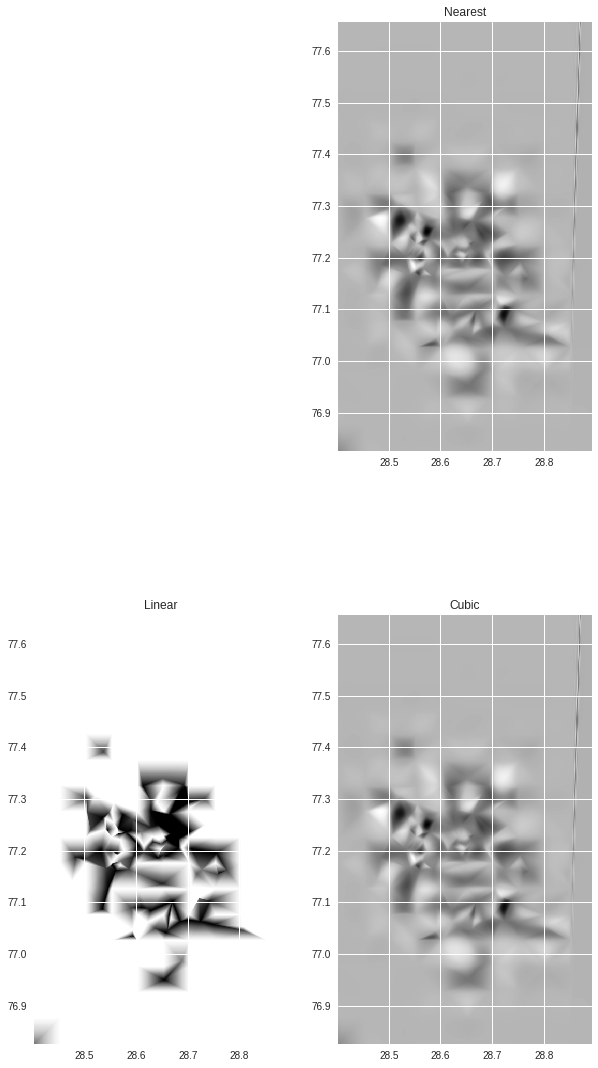

In [0]:
import matplotlib.pyplot as plt
# plt.subplot(221)
# plt.imshow(func(grid_x, grid_y).T, extent=(minLat,maxLat,minLong,maxLong), origin='lower')
# plt.plot(Location[:,0], Location[:,1], 'ro', ms=1)
# # plt.plot(lat, long, 'k.', ms=1)
plt.title('Original')
plt.subplot(222)
plt.imshow(grid_z0.T, extent=(minLat,maxLat,minLong,maxLong), origin='lower')
plt.title('Nearest')
plt.subplot(223)
plt.imshow(grid_z1.T, extent=(minLat,maxLat,minLong,maxLong), origin='lower')
plt.title('Linear')
plt.subplot(224)
plt.imshow(grid_z2.T, extent=(minLat,maxLat,minLong,maxLong), origin='lower')
plt.title('Cubic')
plt.gcf().set_size_inches(10,20)
plt.show()

In [0]:
def getIntensity(lat,long):
  x = (lat - minLat)/(maxLat - minLat) * len(grid_z0)
  y = (long - minLong)/(maxLong - minLong) * len(grid_z0)
  return grid_z1[round(x)][round(y)]

In [0]:
getIntensity(28.684, 77.063)

36.734693877554726

In [0]:
grid_z0

array([[60.        , 58.76884652, 57.5176887 , ..., -0.07220856,
        -0.07487441, -0.07754608],
       [58.75485187, 57.5729266 , 56.33109636, ..., -0.07144917,
        -0.0741043 , -0.07676527],
       [57.49079717, 56.34750302, 55.20333925, ..., -0.0706504 ,
        -0.07329484, -0.07594515],
       ...,
       [ 0.67309781,  0.69104072,  0.70895576, ...,  6.94674138,
         6.9450903 ,  6.94341977],
       [ 0.70824491,  0.72607692,  0.74388118, ...,  6.92944929,
         6.92778255,  6.92609648],
       [ 0.74448235,  0.76220476,  0.77989954, ...,  6.914325  ,
         6.91264392,  6.91094361]])

In [0]:
import matplotlib.pyplot as plt
plt.plot(lat,long, 'ro')
plt.axis([minLat,maxLat,minLong,maxLong])
plt.show()